#  多项式回归

In [1]:
import numpy as np
import torch
from torch import optim
from torch import nn
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(2019)

## 1 定义真实的函数
- $y = 0.9 + 0.5x+3x^2+2.4x^3$

In [3]:
W = torch.FloatTensor([0.5, 3, 2.4]).unsqueeze(1)
b = torch.FloatTensor([0.9])

In [4]:
def f(x):
    return x.mm(W) + b[0]

## 2 生成训练数据

In [5]:
# 需要把[[x1], [x2], ...] 变成[[x1, x1^2, x1^3], [x2, x2^2, x2^3], ...]
def make_features(x):
    x = x.unsqueeze(1)
    return torch.cat([x**i for i in range(1, 4)], 1)

def get_batch(batch_size=32):
    rand_x = torch.randn(batch_size)
    x = make_features(rand_x)
    y = f(x)
    if torch.cuda.is_available():
        return x.cuda(), y.cuda()
    else:
        return x, y

In [6]:
X_train, y_train = get_batch()

In [7]:
X_train.shape

torch.Size([32, 3])

In [8]:
y_train.shape

torch.Size([32, 1])

## 3 定义模型

In [9]:
class PloyRegression(nn.Module):
    def __init__(self):
        super(PloyRegression, self).__init__()
        self.ploy = nn.Linear(3, 1)
    
    def forward(self, x):
        out = self.ploy(x)
        return out

## 4 训练

In [10]:
if torch.cuda.is_available():
    model = PloyRegression().cuda()
else:
    model = PloyRegression()

In [11]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [12]:
def train(model, X_train, y_train, criterion, optimizer):
    epoch = 0
    while True:
        inputs = X_train.cuda()
        target = y_train.cuda()
        out = model(inputs)
        
        loss = criterion(out, target)
        curr_loss = loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (epoch+1) % 100 == 0:
            print("Epoch {} Loss: {:0.6}".format(epoch+1, curr_loss))
        if curr_loss <= 1e-3:
            print("Epoch {} Loss: {:0.6}".format(epoch+1, curr_loss))
            break
        epoch += 1

In [13]:
train(model, X_train, y_train, criterion, optimizer)

Epoch 100 Loss: 11.8712
Epoch 200 Loss: 4.47083
Epoch 300 Loss: 2.06913
Epoch 400 Loss: 1.10911
Epoch 500 Loss: 0.667184
Epoch 600 Loss: 0.443656
Epoch 700 Loss: 0.321121
Epoch 800 Loss: 0.248029
Epoch 900 Loss: 0.200376
Epoch 1000 Loss: 0.166604
Epoch 1100 Loss: 0.14099
Epoch 1200 Loss: 0.120593
Epoch 1300 Loss: 0.103822
Epoch 1400 Loss: 0.0897593
Epoch 1500 Loss: 0.0778256
Epoch 1600 Loss: 0.0676253
Epoch 1700 Loss: 0.0588686
Epoch 1800 Loss: 0.0513292
Epoch 1900 Loss: 0.044824
Epoch 2000 Loss: 0.0392021
Epoch 2100 Loss: 0.0343369
Epoch 2200 Loss: 0.0301213
Epoch 2300 Loss: 0.0264635
Epoch 2400 Loss: 0.0232861
Epoch 2500 Loss: 0.0205222
Epoch 2600 Loss: 0.0181148
Epoch 2700 Loss: 0.0160152
Epoch 2800 Loss: 0.0141815
Epoch 2900 Loss: 0.0125776
Epoch 3000 Loss: 0.0111728
Epoch 3100 Loss: 0.00994048
Epoch 3200 Loss: 0.00885785
Epoch 3300 Loss: 0.00790524
Epoch 3400 Loss: 0.00706582
Epoch 3500 Loss: 0.0063249
Epoch 3600 Loss: 0.00566984
Epoch 3700 Loss: 0.00508985
Epoch 3800 Loss: 0.0045

## 5 测试

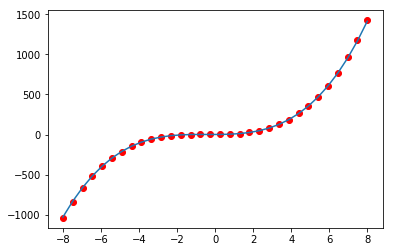

In [14]:
model.eval()

x = torch.FloatTensor(np.sort(np.linspace(-8, 8, 32)))
x_ = make_features(x)
y = f(x_)

pred = model(x_.cuda())

plt.plot(x.numpy(), y.numpy(), 'ro')
plt.plot(x.numpy(), pred.data.cpu().numpy())

In [15]:
# 模型参数
model.state_dict()

OrderedDict([('ploy.weight',
              tensor([[0.5618, 2.9932, 2.3763]], device='cuda:0')),
             ('ploy.bias', tensor([0.9135], device='cuda:0'))])

##  总结
- torch定义的模型传入的训练数据默认FloatTensor
- 多项式回归的时候同一个x, 最高次如果是n，则需要把一个样本变成n列。$[[x_1], [x_2], ...] -->[[x_1, x_1^2, x_1^3], [x_2, x_2^2, x_2^3], ...]$
- x.squeeze(0)  # squeeze中的参数0、1分别代表第一、第二维度，squeeze(0)表示如果第一维度值为1，则去掉，否则不变。故a的维度(1,3),可去掉1成(3),但不可去掉3。

```python
a = torch.FloatTensor([[1.1, 2.2, 3.3]])
print(a.shape)   '''torch.Size([1, 3])'''

x = a.squeeze(0)
print(x.shape)   '''torch.Size([3])''' 

a = torch.randn(5)
print(a.shape)   '''torch.Size([5])'''

x = a.unsqueeze(1)
print(x.shape)   '''torch.Size([5, 1])'''
```